In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load dataset
dataset = pd.read_csv('/home/admin1/PycharmProjects/Basic Python/myprograms/WEEK_12/K-Means Clustering/Datasets/Mall_Customers.csv')

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 200 rows and 5 Columns


In [9]:
dataset.sample()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
91,92,Male,18,59,41


In [10]:
# checking information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [12]:
# checking null values in dataset
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# check for minimum dataset
dataset.min()

CustomerID                     1
Genre                     Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [14]:
# get input data as X
X = dataset.iloc[:,[3,4]].values

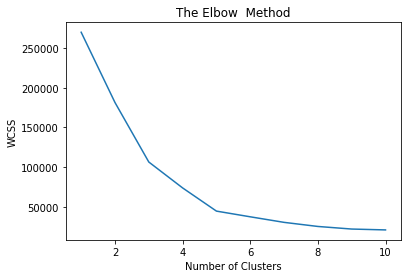

In [15]:
# Find optimal number of clusters using  elbow method

WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),WCSS)
plt.title('The Elbow  Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Applying KMeans to mall_customer dataset
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
# find for each observation which cluster it belongs
y_kmeans = kmeans.fit_predict(X)

In [17]:
# cluster 0-4 mean 1-5 clusters
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

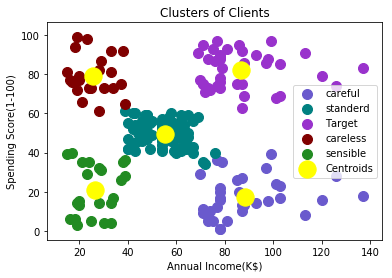

In [18]:
# visualizing clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c='slateblue',label='careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='teal',label='standerd')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='darkorchid',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='maroon',label='careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='forestgreen',label='sensible')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()